1. 당뇨병 데이터를 가지고 머신러닝 5가지 분류를 수행.(SVM, LR, RF, DT, KNN)

2. 동일한 데이터로 딥러닝 분류 수행하라. (dense layer 만 사용)

3. 해당 데이터에서 Outcome을 삭제하고 BMI를 예측하는 회귀를 수행하라.

## 4. 3번과 동일하지만 dense layer만 사용한 신경만으로 회귀를 수행하라.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import tensorflow as tf
from tensorflow import keras

In [33]:
df = pd.read_csv("C:/Users/syk98/Desktop/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


## data 확인

In [36]:
# 컬럼명 확인
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## data/label & train/test dataset 나누기

In [43]:
# Outcome column 삭제
df.drop(columns=['Outcome'], inplace=True)
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [45]:
X = df.drop('BMI', axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,
6,148,72,35,0,0.627,50
1,85,66,29,0,0.351,31
8,183,64,0,0,0.672,32
1,89,66,23,94,0.167,21
0,137,40,35,168,2.288,33


In [47]:
y = df['BMI']
y.head()

Pregnancies
6    33.6
1    26.6
8    23.3
1    28.1
0    43.1
Name: BMI, dtype: float64

In [49]:
# 딥러닝 입력을 위해 numpy로 변환
X = X.values
y = y.values

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 모델 생성, 예측, 분류

In [66]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()

model.add(Dense(6,input_shape=(6,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

C:\Users\syk98\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 30)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,213 (4.74 KB)

 Trainable params: 1,213 (4.74 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1058.1324 - mse: 1058.1324 - val_loss: 953.8457 - val_mse: 953.8457
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 903.1466 - mse: 903.1466 - val_loss: 823.6578 - val_mse: 823.6578
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 788.3179 - mse: 788.3179 - val_loss: 717.0839 - val_mse: 717.0839
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 674.0244 - mse: 674.0244 - val_loss: 633.5898 - val_mse: 633.5898
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 624.8428 - mse: 624.8428 - val_loss: 574.9879 - val_mse: 574.9879
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 561.5535 - mse: 561.5535 - val_loss: 533.4180 - val_mse: 533.4180
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 505.5012 - mse: 505.5012 - val_loss: 499.9323 - val_mse: 499.9323
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 456.3995 - mse: 456.3995 - val_loss: 471.4403 - val_mse: 471.4403
Epoch

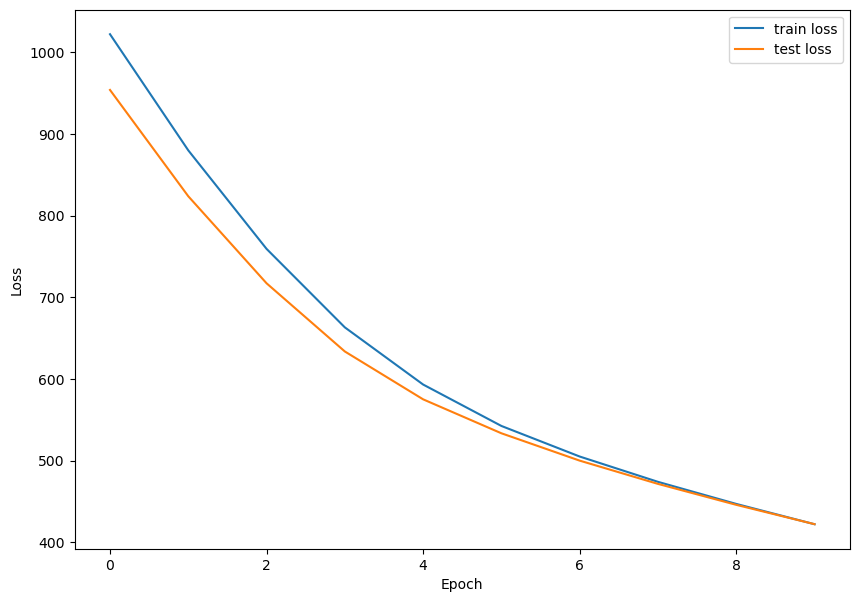

In [70]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [72]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 422.2888 - mse: 422.2888 


[422.1164245605469, 422.1164245605469]